# Búsqueda Tabú aplicada al Sudoku

Primero importamos algunas librerías.

In [5]:
from time import time
import pandas as pd
from IPython.display import Image
global semilla
semilla=18333

Vamos a emplear nuestros propios generadores de números aleatorios, uno para valores entre 0 y 1, y otro para valores enteros.

In [6]:
def generador0_1():
    global semilla
    a=314159269
    c=453806245
    m=pow(2,31)
    
    z=((a*semilla)+c)%m
    aleatorio = round(float(z)/m,10)
    semilla=z
    return aleatorio

In [7]:
#Esta funcion genera numeros aleatorios dentro del rango dado.
def generador0_n(n):
    global semilla
    m=pow(2,31)
    a=314159269
    c=453806245
    
    z=((a*semilla)+c)%m
    semilla=z
    rand=(float(z)/m) * n
    aleatorio = int(rand)
    if aleatorio == n:
      aleatorio = n-1
    
    return aleatorio

Para seguir adelante necesitamos cargar la información de un sudoku, así que importaremos uno desde Github.

In [12]:
url = "https://raw.githubusercontent.com/Material-Educativo/Inteligencia-Artificial/main/sudoku1.jpg"


Primero vamos a verlo en su forma clásica.

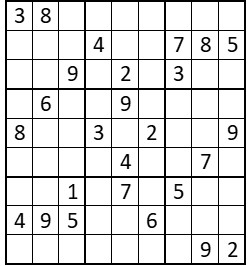

In [13]:
Image(url)

Ahora vamos a diseñar una función que permita leer el mismo Sudoku, que fue previamente guardado en un archivo csv en la siguiente dirección url.

In [14]:
url = "https://raw.githubusercontent.com/Material-Educativo/Inteligencia-Artificial/main/Sudoku.csv"
df = pd.read_csv(url, header = None)

Hemos guardado la información en la variable *df*, vamos a imprimirla para ver que se cargó correctamente.

In [15]:
df

,0,1,2,3,4,5,6,7,8
0,3,8,0,0,0,0,0,0,0
1,0,0,0,4,0,0,7,8,5
2,0,0,9,0,2,0,3,0,0
3,0,6,0,0,9,0,0,0,0
4,8,0,0,3,0,2,0,0,9
5,0,0,0,0,4,0,0,7,0
6,0,0,1,0,7,0,5,0,0
7,4,9,5,0,0,6,0,0,0
8,0,0,0,0,0,0,0,9,2


Ahora vamos a escribir una función que guarde los valores de cada cuadrante en un arreglo, y pondremos los 9 arreglos resultantes en una lista.

In [16]:
def leer_sudoku():
    sudoku=[]
    subcuadrado=[]
    
    for n in range(3):
        for m in range(3):
            subcuadrado=[]
            for i in range(3*n,3*(n+1)):
                for j in range(3*m,3*(m+1)):
                    subcuadrado.append(df[j][i])
            sudoku.append(subcuadrado)

    return sudoku

Veamos cómo queda después de emplear la función *leer_sudoku*.

Observa que hay nueve vectores, y cada uno tiene los valores de un cuadrante diferente.

In [17]:
sudoku=leer_sudoku()
print ('Sudoku leido desde el archivo:')
print (sudoku)

Sudoku leido desde el archivo:
[[3, 8, 0, 0, 0, 0, 0, 0, 9], [0, 0, 0, 4, 0, 0, 0, 2, 0], [0, 0, 0, 7, 8, 5, 3, 0, 0], [0, 6, 0, 8, 0, 0, 0, 0, 0], [0, 9, 0, 3, 0, 2, 0, 4, 0], [0, 0, 0, 0, 0, 9, 0, 7, 0], [0, 0, 1, 4, 9, 5, 0, 0, 0], [0, 7, 0, 0, 0, 6, 0, 0, 0], [5, 0, 0, 0, 0, 0, 0, 9, 2]]


Vamos a imprimirlo en el orden adecuado.

In [18]:
print (sudoku[0][0]," ",sudoku[0][1]," ",sudoku[0][2]," | ",sudoku[1][0]," ",sudoku[1][1]," ",sudoku[1][2]," | ",sudoku[2][0]," ",sudoku[2][1]," ",sudoku[2][2]," ",)
print (sudoku[0][3]," ",sudoku[0][4]," ",sudoku[0][5]," | ",sudoku[1][3]," ",sudoku[1][4]," ",sudoku[1][5]," | ",sudoku[2][3]," ",sudoku[2][4]," ",sudoku[2][5]," ",)
print (sudoku[0][6]," ",sudoku[0][7]," ",sudoku[0][8]," | ",sudoku[1][6]," ",sudoku[1][7]," ",sudoku[1][8]," | ",sudoku[2][6]," ",sudoku[2][7]," ",sudoku[2][8]," ",)
print("")
print (sudoku[3][0]," ",sudoku[3][1]," ",sudoku[3][2]," | ",sudoku[4][0]," ",sudoku[4][1]," ",sudoku[4][2]," | ",sudoku[5][0]," ",sudoku[5][1]," ",sudoku[5][2]," ",)
print (sudoku[3][3]," ",sudoku[3][4]," ",sudoku[3][5]," | ",sudoku[4][3]," ",sudoku[4][4]," ",sudoku[4][5]," | ",sudoku[5][3]," ",sudoku[5][4]," ",sudoku[5][5]," ",)
print (sudoku[3][6]," ",sudoku[3][7]," ",sudoku[3][8]," | ",sudoku[4][6]," ",sudoku[4][7]," ",sudoku[4][8]," | ",sudoku[5][6]," ",sudoku[5][7]," ",sudoku[5][8]," ",)
print("")
print (sudoku[6][0]," ",sudoku[6][1]," ",sudoku[6][2]," | ",sudoku[7][0]," ",sudoku[7][1]," ",sudoku[7][2]," | ",sudoku[8][0]," ",sudoku[8][1]," ",sudoku[8][2]," ",)
print (sudoku[6][3]," ",sudoku[6][4]," ",sudoku[6][5]," | ",sudoku[7][3]," ",sudoku[7][4]," ",sudoku[7][5]," | ",sudoku[8][3]," ",sudoku[8][4]," ",sudoku[8][5]," ",)
print (sudoku[6][6]," ",sudoku[6][7]," ",sudoku[6][8]," | ",sudoku[7][6]," ",sudoku[7][7]," ",sudoku[7][8]," | ",sudoku[8][6]," ",sudoku[8][7]," ",sudoku[8][8]," ",)


3   8   0  |  0   0   0  |  0   0   0  
0   0   0  |  4   0   0  |  7   8   5  
0   0   9  |  0   2   0  |  3   0   0  

0   6   0  |  0   9   0  |  0   0   0  
8   0   0  |  3   0   2  |  0   0   9  
0   0   0  |  0   4   0  |  0   7   0  

0   0   1  |  0   7   0  |  5   0   0  
4   9   5  |  0   0   6  |  0   0   0  
0   0   0  |  0   0   0  |  0   9   2  


Para empezar el proceso de búsqueda necesitamos una solución inicial aleatoria, que respete los valores fijos dados por el sudoku inicial.

Para facilitar el trabajo al algoritmo, vamos a garantizar que los dígitos del 1 al 9 aparecen exactamente una vez en cada cuadrante.

Recordemos que cada cuadrante se va a manejar por separado.

In [19]:
# Funcion que genera soluciones aleatorias
def solaleatorias(lista):
    global semilla
    a=[]
    listaaux=[]
    for i in (lista):
        for j in i:
            a.append(j)
        listaaux.append(a)
        a=[]
    for i in range(len(listaaux)):
        aux=[1,2,3,4,5,6,7,8,9]
        for j in range(len(listaaux[i])):
            if listaaux[i][j] in aux:
                aux.remove(listaaux[i][j])
        for j in range(len(listaaux[i])):
            if len(aux)==0:
                break
            aleatorio=generador0_n(9)
            while listaaux[i][aleatorio]!=0:
                aleatorio=generador0_n(9)
            listaaux[i][aleatorio]=aux.pop(0)
    return listaaux

Ahora vamos a escribir la función objetivo, en este caso se penaliza con una unidad cuando un dígito no parece en un renglón, o en  una columna. De esta forma, cuando la función objetivo vale cero hemos resuelto el sudoku.

Como hemos guardado la información de cada cuadrante por separado, lo primero que debe hacerse es recuperar la forma original del sudoku.

In [20]:
#Funcion de costo, basada en la funcion objetivo descrita en el articulo del profesor Sergio de los Cobos
def costo(lista):
    filas=[]
    columnas=[]
    aux=[]
    penalizacion=0
    for n in range(3):
        for m in range(3):
            aux=[]
            for i in range(3*n,3*(n+1)):
                for j in range(3*m,3*(m+1)):
                    aux.append(lista[i][j])
            filas.append(aux)
    aux=[]
    for n in range(len(filas)):
        aux=[]
        for m in range(len(filas)):
            aux.append(filas[m][n])
        columnas.append(aux)

    for i in range(1,10):
        for n in range(len(filas)):
            if i in filas[n]:
                continue
            else:
                penalizacion=penalizacion+1

    for i in range(1,10):
        for n in range(len(columnas)):
            if i in columnas[n]:
                continue
            else:
                penalizacion=penalizacion+1
    return penalizacion

Generemos una solución inicial.

In [21]:
solucion=solaleatorias(sudoku)

Veamos cómo quedó la aolución aleatoria.

In [22]:
mejorsolucion=[]
b=[]
for i in (solucion):
    for j in i:
        b.append(j)
    mejorsolucion.append(b)
    b=[]
print ('Sudoku original:')
print (sudoku)
print ('Sudoku despues de generar solucion aleatoria:')
print (solucion)
costo1=costo(solucion)
print ('El costo de la solucion es:')
print (costo1)
print ('Mejor solucion encontrada:')
print (mejorsolucion)
mejorcosto=costo(mejorsolucion)

Sudoku original:
[[3, 8, 0, 0, 0, 0, 0, 0, 9], [0, 0, 0, 4, 0, 0, 0, 2, 0], [0, 0, 0, 7, 8, 5, 3, 0, 0], [0, 6, 0, 8, 0, 0, 0, 0, 0], [0, 9, 0, 3, 0, 2, 0, 4, 0], [0, 0, 0, 0, 0, 9, 0, 7, 0], [0, 0, 1, 4, 9, 5, 0, 0, 0], [0, 7, 0, 0, 0, 6, 0, 0, 0], [5, 0, 0, 0, 0, 0, 0, 9, 2]]
Sudoku despues de generar solucion aleatoria:
[[3, 8, 1, 2, 4, 5, 7, 6, 9], [3, 5, 8, 4, 7, 9, 6, 2, 1], [9, 4, 6, 7, 8, 5, 3, 1, 2], [9, 6, 1, 8, 2, 4, 3, 7, 5], [5, 9, 7, 3, 8, 2, 6, 4, 1], [4, 2, 8, 3, 5, 9, 1, 7, 6], [2, 7, 1, 4, 9, 5, 3, 8, 6], [4, 7, 3, 1, 8, 6, 9, 2, 5], [5, 4, 7, 8, 3, 6, 1, 9, 2]]
El costo de la solucion es:
45
Mejor solucion encontrada:
[[3, 8, 1, 2, 4, 5, 7, 6, 9], [3, 5, 8, 4, 7, 9, 6, 2, 1], [9, 4, 6, 7, 8, 5, 3, 1, 2], [9, 6, 1, 8, 2, 4, 3, 7, 5], [5, 9, 7, 3, 8, 2, 6, 4, 1], [4, 2, 8, 3, 5, 9, 1, 7, 6], [2, 7, 1, 4, 9, 5, 3, 8, 6], [4, 7, 3, 1, 8, 6, 9, 2, 5], [5, 4, 7, 8, 3, 6, 1, 9, 2]]


Veamos la solución aleatoria en el orden tradicional.

In [23]:
print (solucion[0][0]," ",solucion[0][1]," ",solucion[0][2]," | ",solucion[1][0]," ",solucion[1][1]," ",solucion[1][2]," | ",solucion[2][0]," ",solucion[2][1]," ",solucion[2][2]," ",)
print (solucion[0][3]," ",solucion[0][4]," ",solucion[0][5]," | ",solucion[1][3]," ",solucion[1][4]," ",solucion[1][5]," | ",solucion[2][3]," ",solucion[2][4]," ",solucion[2][5]," ",)
print (solucion[0][6]," ",solucion[0][7]," ",solucion[0][8]," | ",solucion[1][6]," ",solucion[1][7]," ",solucion[1][8]," | ",solucion[2][6]," ",solucion[2][7]," ",solucion[2][8]," ",)
print("")
print (solucion[3][0]," ",solucion[3][1]," ",solucion[3][2]," | ",solucion[4][0]," ",solucion[4][1]," ",solucion[4][2]," | ",solucion[5][0]," ",solucion[5][1]," ",solucion[5][2]," ",)
print (solucion[3][3]," ",solucion[3][4]," ",solucion[3][5]," | ",solucion[4][3]," ",solucion[4][4]," ",solucion[4][5]," | ",solucion[5][3]," ",solucion[5][4]," ",solucion[5][5]," ",)
print (solucion[3][6]," ",solucion[3][7]," ",solucion[3][8]," | ",solucion[4][6]," ",solucion[4][7]," ",solucion[4][8]," | ",solucion[5][6]," ",solucion[5][7]," ",solucion[5][8]," ",)
print("")
print (solucion[6][0]," ",solucion[6][1]," ",solucion[6][2]," | ",solucion[7][0]," ",solucion[7][1]," ",solucion[7][2]," | ",solucion[8][0]," ",solucion[8][1]," ",solucion[8][2]," ",)
print (solucion[6][3]," ",solucion[6][4]," ",solucion[6][5]," | ",solucion[7][3]," ",solucion[7][4]," ",solucion[7][5]," | ",solucion[8][3]," ",solucion[8][4]," ",solucion[8][5]," ",)
print (solucion[6][6]," ",solucion[6][7]," ",solucion[6][8]," | ",solucion[7][6]," ",solucion[7][7]," ",solucion[7][8]," | ",solucion[8][6]," ",solucion[8][7]," ",solucion[8][8]," ",)


3   8   1  |  3   5   8  |  9   4   6  
2   4   5  |  4   7   9  |  7   8   5  
7   6   9  |  6   2   1  |  3   1   2  

9   6   1  |  5   9   7  |  4   2   8  
8   2   4  |  3   8   2  |  3   5   9  
3   7   5  |  6   4   1  |  1   7   6  

2   7   1  |  4   7   3  |  5   4   7  
4   9   5  |  1   8   6  |  8   3   6  
3   8   6  |  9   2   5  |  1   9   2  


Ahora preparemos los parámetros para el algoritmo basado en Búsqueda Tabú

In [24]:
N_iteraciones = 5000
Tam_Lista = 10

Lista_tabu_Cuadrante = [-1] * Tam_Lista
Lista_tabu_Celda1 = [-1] * Tam_Lista
Lista_tabu_Celda2 = [-1] * Tam_Lista
Soluciones_Vecinas_Cuadrante = []
Soluciones_Vecinas_Celda1 = []
Soluciones_Vecinas_Celda2 = []
Costos_Vecinas = []

Finalmente, podemos escribir el algoritmo de búsqueda y mejora.

Se propone que las soluciones vecinas se generen al intercambiar los valores de dos celdas dentro del mismo cuadrante.

La lista Tabú incluirá las dos celdas empleadas para el intercambio de valores.

In [25]:
tiempoinicial = time()

for iteracion in range(N_iteraciones):
  # Generamos las soluciones vecinas que vamos a explorar
  for c0 in range(9): # Para movernos en el cuadrante
    for c1 in range(9-1): # Para movernos en las celdas
      for c2 in range(c1+1,9): # Para movernos en las celdas
        
        Cuadrante = c0
        
        Celda1 = c1
        if (sudoku[Cuadrante][Celda1]!=0):
          continue
        
        Celda2 = c2
        if (sudoku[Cuadrante][Celda2]!=0):
          continue
        
        # Generamos una solución vecina al intercambiar los valores de Celda1 y Celda2
        intercambio=solucion[Cuadrante][Celda1]
        solucion[Cuadrante][Celda1] = solucion[Cuadrante][Celda2]
        solucion[Cuadrante][Celda2] = intercambio

        # Revisamos si la selección está en la lista tabú
        Tabu = 0
        for i in range(Tam_Lista):
          if Lista_tabu_Cuadrante[i] == Cuadrante:
            if Lista_tabu_Celda1[i] == Celda1 and Lista_tabu_Celda2[i] == Celda2:
              Tabu = 1
              break
            if Lista_tabu_Celda2[i] == Celda1 and Lista_tabu_Celda1[i] == Celda2:
              Tabu = 1
              break

        # Evaluamos el costo con la dunción objetivo
        costo2 = costo(solucion)

        # Si el movimiento es tabú le asignamos un costo alto
        # a menos que cumpla el criterio de aspiración
        if Tabu == 1 and costo2 >= mejorcosto:
            costo2 = 100000

        # Guardamos toda la información en listas
        Soluciones_Vecinas_Cuadrante.append(Cuadrante)
        Soluciones_Vecinas_Celda1.append(Celda1)
        Soluciones_Vecinas_Celda2.append(Celda2)
        Costos_Vecinas.append(costo2)

        # Deshacemos los cambios realizados para recuperar la solucion actual
        intercambio=solucion[Cuadrante][Celda1]
        solucion[Cuadrante][Celda1] = solucion[Cuadrante][Celda2]
        solucion[Cuadrante][Celda2] = intercambio
  
  # Buscamos el menor costo de las soluciones visitadas
  minimo = Costos_Vecinas[0]
  for i in range(len(Costos_Vecinas)):
    if minimo > Costos_Vecinas[i]:
      minimo = Costos_Vecinas[i]
  
  # Revisamos si el mínimo se repite más de una vez
  contador = 0
  for i in range(len(Costos_Vecinas)):
    if minimo == Costos_Vecinas[i]:
      contador = contador + 1
  
  # Si se repite más de una vez elejimos una de esas soluciones al azar
  # Si sólo aparece una vez, reconstruimos la solución vecina con ese costo
  if contador > 1:
    seleccionada = generador0_n(contador) + 1
  else:
    seleccionada = 1
  # Veamos la posición de la solución seleccionada
  contador = 0
  for i in range(len(Costos_Vecinas)):
    if minimo == Costos_Vecinas[i]:
      contador = contador + 1
    if contador == seleccionada:
      seleccionada = i
      break
  
  # Ahora sustituimos la solución actual con la solución seleccionada
  Cuadrante = Soluciones_Vecinas_Cuadrante[seleccionada]
  Celda1 = Soluciones_Vecinas_Celda1[seleccionada]
  Celda2 = Soluciones_Vecinas_Celda2[seleccionada]
  
  intercambio=solucion[Cuadrante][Celda1]
  solucion[Cuadrante][Celda1] = solucion[Cuadrante][Celda2]
  solucion[Cuadrante][Celda2] = intercambio
  costo1 = Costos_Vecinas[seleccionada]

  # Revisamos si hemos mejorado lo mejora conocido
  if costo1 < mejorcosto:
    mejorcosto = costo1
    mejorsolucion = []
    b=[]
    for i in (solucion):
        for j in i:
            b.append(j)
        mejorsolucion.append(b)
        b=[]
      
  # Actualizamos las listas tabú
  Lista_tabu_Cuadrante.append(Cuadrante)
  Lista_tabu_Celda1.append(Celda1)
  Lista_tabu_Celda2.append(Celda2)

  Lista_tabu_Cuadrante.pop(0)
  Lista_tabu_Celda1.pop(0)
  Lista_tabu_Celda2.pop(0)


  # Vaciamos las listas para volver a susarlas
  Soluciones_Vecinas_Cuadrante = []
  Soluciones_Vecinas_Celda1 = []
  Soluciones_Vecinas_Celda2 = []
  Costos_Vecinas = []

  #Imprimimos la iformación actual
  print("Costo actual = ",costo1,"  Mejor costo = ",mejorcosto)
  #print("Lc = ",Lista_tabu_Cuadrante," LC1 = ",Lista_tabu_Celda1)

  if mejorcosto == 0:
    break

tiempofinal=time()

Costo actual =  41   Mejor costo =  41
Costo actual =  37   Mejor costo =  37
Costo actual =  34   Mejor costo =  34
Costo actual =  31   Mejor costo =  31
Costo actual =  29   Mejor costo =  29
Costo actual =  27   Mejor costo =  27
Costo actual =  25   Mejor costo =  25
Costo actual =  23   Mejor costo =  23
Costo actual =  22   Mejor costo =  22
Costo actual =  20   Mejor costo =  20
Costo actual =  19   Mejor costo =  19
Costo actual =  18   Mejor costo =  18
Costo actual =  17   Mejor costo =  17
Costo actual =  15   Mejor costo =  15
Costo actual =  14   Mejor costo =  14
Costo actual =  13   Mejor costo =  13
Costo actual =  12   Mejor costo =  12
Costo actual =  12   Mejor costo =  12
Costo actual =  12   Mejor costo =  12
Costo actual =  12   Mejor costo =  12
Costo actual =  11   Mejor costo =  11
Costo actual =  11   Mejor costo =  11
Costo actual =  10   Mejor costo =  10
Costo actual =  10   Mejor costo =  10
Costo actual =  8   Mejor costo =  8
Costo actual =  8   Mejor c

Costo actual =  5   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
C

Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  2   Mejor costo =  2
Costo actual =  3   Mejor costo =  2
Costo actual =  3   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  7   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  7   Mejor costo =  2
Costo actual =  7   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  2   Mejor costo =  2
Costo actual =  3   Mejor costo =  2
Costo actual =  3   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
C

Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
C

Costo actual =  2   Mejor costo =  2
Costo actual =  2   Mejor costo =  2
Costo actual =  2   Mejor costo =  2
Costo actual =  2   Mejor costo =  2
Costo actual =  3   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  3   Mejor costo =  2
Costo actual =  3   Mejor costo =  2
Costo actual =  2   Mejor costo =  2
Costo actual =  2   Mejor costo =  2
Costo actual =  2   Mejor costo =  2
Costo actual =  2   Mejor costo =  2
Costo actual =  2   Mejor costo =  2
Costo actual =  3   Mejor costo =  2
Costo actual =  3   Mejor costo =  2
Costo actual =  3   Mejor costo =  2
Costo actual =  4   Mejor costo =  2
Costo actual =  5   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
Costo actual =  6   Mejor costo =  2
C

In [26]:
tiempoejecucion=tiempofinal-tiempoinicial

print ('\nLa mejor solucion conocida es:')
print (mejorsolucion)
print ('El mejor costo es:')
print (mejorcosto)
print ('El tiempo de ejecucion en segundos es:')
print (tiempoejecucion)


La mejor solucion conocida es:
[[3, 8, 4, 1, 2, 6, 7, 5, 9], [5, 6, 7, 4, 3, 9, 8, 2, 1], [9, 2, 1, 7, 8, 5, 3, 4, 6], [5, 6, 3, 8, 4, 7, 9, 1, 2], [7, 9, 8, 3, 1, 2, 6, 4, 5], [2, 1, 4, 6, 5, 9, 8, 7, 3], [2, 3, 1, 4, 9, 5, 6, 7, 8], [9, 7, 4, 2, 8, 6, 1, 5, 3], [5, 6, 8, 1, 3, 7, 4, 9, 2]]
El mejor costo es:
0
El tiempo de ejecucion en segundos es:
18.40819215774536


Veamos la mejor solución en el formato tradicional.

In [27]:
print (mejorsolucion[0][0]," ",mejorsolucion[0][1]," ",mejorsolucion[0][2]," | ",mejorsolucion[1][0]," ",mejorsolucion[1][1]," ",mejorsolucion[1][2]," | ",mejorsolucion[2][0]," ",mejorsolucion[2][1]," ",mejorsolucion[2][2]," ",)
print (mejorsolucion[0][3]," ",mejorsolucion[0][4]," ",mejorsolucion[0][5]," | ",mejorsolucion[1][3]," ",mejorsolucion[1][4]," ",mejorsolucion[1][5]," | ",mejorsolucion[2][3]," ",mejorsolucion[2][4]," ",mejorsolucion[2][5]," ",)
print (mejorsolucion[0][6]," ",mejorsolucion[0][7]," ",mejorsolucion[0][8]," | ",mejorsolucion[1][6]," ",mejorsolucion[1][7]," ",mejorsolucion[1][8]," | ",mejorsolucion[2][6]," ",mejorsolucion[2][7]," ",mejorsolucion[2][8]," ",)
print("")
print (mejorsolucion[3][0]," ",mejorsolucion[3][1]," ",mejorsolucion[3][2]," | ",mejorsolucion[4][0]," ",mejorsolucion[4][1]," ",mejorsolucion[4][2]," | ",mejorsolucion[5][0]," ",mejorsolucion[5][1]," ",mejorsolucion[5][2]," ",)
print (mejorsolucion[3][3]," ",mejorsolucion[3][4]," ",mejorsolucion[3][5]," | ",mejorsolucion[4][3]," ",mejorsolucion[4][4]," ",mejorsolucion[4][5]," | ",mejorsolucion[5][3]," ",mejorsolucion[5][4]," ",mejorsolucion[5][5]," ",)
print (mejorsolucion[3][6]," ",mejorsolucion[3][7]," ",mejorsolucion[3][8]," | ",mejorsolucion[4][6]," ",mejorsolucion[4][7]," ",mejorsolucion[4][8]," | ",mejorsolucion[5][6]," ",mejorsolucion[5][7]," ",mejorsolucion[5][8]," ",)
print("")
print (mejorsolucion[6][0]," ",mejorsolucion[6][1]," ",mejorsolucion[6][2]," | ",mejorsolucion[7][0]," ",mejorsolucion[7][1]," ",mejorsolucion[7][2]," | ",mejorsolucion[8][0]," ",mejorsolucion[8][1]," ",mejorsolucion[8][2]," ",)
print (mejorsolucion[6][3]," ",mejorsolucion[6][4]," ",mejorsolucion[6][5]," | ",mejorsolucion[7][3]," ",mejorsolucion[7][4]," ",mejorsolucion[7][5]," | ",mejorsolucion[8][3]," ",mejorsolucion[8][4]," ",mejorsolucion[8][5]," ",)
print (mejorsolucion[6][6]," ",mejorsolucion[6][7]," ",mejorsolucion[6][8]," | ",mejorsolucion[7][6]," ",mejorsolucion[7][7]," ",mejorsolucion[7][8]," | ",mejorsolucion[8][6]," ",mejorsolucion[8][7]," ",mejorsolucion[8][8]," ",)


3   8   4  |  5   6   7  |  9   2   1  
1   2   6  |  4   3   9  |  7   8   5  
7   5   9  |  8   2   1  |  3   4   6  

5   6   3  |  7   9   8  |  2   1   4  
8   4   7  |  3   1   2  |  6   5   9  
9   1   2  |  6   4   5  |  8   7   3  

2   3   1  |  9   7   4  |  5   6   8  
4   9   5  |  2   8   6  |  1   3   7  
6   7   8  |  1   5   3  |  4   9   2  
